# WDA - Certification project

## Introduction into the data

* [Kickstarter](https://www.kickstarter.com/) is a funding platform for creative projects.
* How it works:
 1. As a registered user - you can publish your Project = an idea what product you want to build for people - everything from films, games, and music to art, design, and technology.
 1. You set clear financial goal = how much money you need to build the product.
 1. People, who like your project, can send you money - an in exchange they receive the product after successful raise of money.
   * (these people are called 'backers')
 1. If project does not raise enough money -> it is cancelled and money are returned back to the backers.
 1. If project raises enough money - Kickstarter sends the collected money to the owners of the Project -> they use them to build their product.
 1. After product is built / manufactured -> the products are sent and delivered to the backers.

### Dataset

Dataset describes all Kickstarter Projects until DEC 2016.
* **each row** contains one Project
* **each column** describes some attributes of the Project

### Description of all columns

* **ID**: unique ID of the project
* **name**: project name
* **category**: custom category of the project
* **main_category**: official categories of the projects
* **currency**: in which currency the money is pledged (=collected, raised)
* **deadline**: last date/time, until when money is collected
* **goal**: money target - how much money the project needs to pledge (collect), so it can start a production
* **launched**: starting date/time of the project
* **pledged**: amount of pledged (collected) money
* **state**: state of the project
* **backers**: count of backers (people, that funded project)
* **country**: country of the project
* **'usd pledged'**: amount pledged - but converted to USD currency

### How easy or hard is this certification?
* Many questions are short one-liners = they are quite easy and take little time 
* All tasks are relatively simple and they never take more than max 3-4 lines of code
* There are no catchy things or very complex tasks.

### How much time do you have to deliver solutions?
* Expected time to finish is 3-4 hours.
  * but everybody has up to **12 hours** to deliver solutions, so you can stay calm and easy
* Example:
  * If you receive certification at 8:30, the latest time for delivering solutions is 20:30.

### How to deliver solutions? 
Please send your solution (filled python notebook) to stefan.simik@gmail.com


Good luck and happy coding!

# Tasks and questions

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px

In [2]:
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

## Load data and show preview of some rows

* Load the data from CSV file:
  * `kickstarter.csv`
* Note: 
  * After loading the data, you will find 4 empty columns called like 'Unnamed XX'.
    * This is OK, because they exist also in the CSV file. We'll get rid of them later.

In [3]:
# Write code here

df_kickstarter = pd.read_csv('kickstarter.csv', sep=',', low_memory=False)

df_kickstarter.head()

ID                                               name   \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000004038                                     Where is Hank?   
2  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
3  1000011046  Community Film Project: The Art of Neighborhoo...   
4  1000014025                               Monarch Espresso Bar   

        category  main_category  currency             deadline   goal   \
0          Poetry     Publishing       GBP  2015-10-09 11:36:00   1000   
1  Narrative Film   Film & Video       USD  2013-02-26 00:20:50  45000   
2           Music          Music       USD  2012-04-16 04:24:11   5000   
3    Film & Video   Film & Video       USD  2015-08-29 01:00:00  19500   
4     Restaurants           Food       USD  2016-04-01 13:38:27  50000   

             launched  pledged       state  backers  country  usd pledged   \
0  2015-08-11 12:12:28        0      failed        0       GB            0   
1  2013-01-12 00:20:50      220      failed        3       US          220   
2  2012-03-17 03:24:11        1      failed        1       US            1   
3  2015-07-04 08:35:03     1283    canceled       14       US         1283   
4  2016-02-26 13:38:27    52375  successful      224       US        52375   

  Unnamed: 13 Unnamed: 14  Unnamed: 15  Unnamed: 16  
0         NaN         NaN          NaN          NaN  
1         NaN         NaN          NaN          NaN  
2         NaN         NaN          NaN          NaN  
3         NaN         NaN          NaN          NaN  
4         NaN         NaN          NaN          NaN

## Basics about data

### Question: How many Kickstarter projects are in the data?

* You can translate the question as: How many rows are in the data?

In [4]:
# Write code here
df_kickstarter.shape[0]

323749

### Question: How many columns are in the input data?

* (Yes, including those last 4 empty columns

In [5]:
# Write code here
df_kickstarter.shape[1]

17

### Task: Show names of all columns

In [6]:
# Write code here

df_kickstarter.columns

Index(['ID ', 'name ', 'category ', 'main_category ', 'currency ', 'deadline ',
       'goal ', 'launched ', 'pledged ', 'state ', 'backers ', 'country ',
       'usd pledged ', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16'],
      dtype='object')

## Working with strings

### Task: Fix columns names

When you look at the column names (from previous task), you can see, 
they are not clean, because they contain one additional `space` at the end.<br/>

Let's fix it and ensure, each column-name is clean = without that `last space` at the end.

**Hint:** In case you have no idea - search google using keywords: `pandas dataframe remove space from column name`

In [40]:
# Write code here

df_updated = df_kickstarter.rename(columns = lambda col: col.strip(' '))
df_updated.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16'],
      dtype='object')

## Dataframe transformations

### Task: Remove 4 last columns

Remove last 4 columns called like `Unnamed XX`,<br/>so we can work with cleaner DataFrame for next tasks.

In [41]:
# Write code here

df_updated.drop(columns=['Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16'], inplace=True)

### Task: Reorder columns

We are not satisfied with how the columns are ordered in DataFrame<br/>
and we would prefer to see columns in different order - so that related columns are together.

* This is expected columns order:
  * `'ID', 'name', 'main_category', 'category', 'launched', 'deadline', 'goal', 'pledged', 'currency', 'usd pledged', 'backers', 'state', 'country'`

In [43]:
# Write code here

cols = ['ID', 'name', 'main_category', 'category', 'launched', 'deadline', 'goal', 'pledged', 'currency', 'usd pledged', 'backers', 'state', 'country']

df = df_updated[cols]


df.head()

ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000004038                                     Where is Hank?   
2  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
3  1000011046  Community Film Project: The Art of Neighborhoo...   
4  1000014025                               Monarch Espresso Bar   

  main_category        category             launched             deadline  \
0    Publishing          Poetry  2015-08-11 12:12:28  2015-10-09 11:36:00   
1  Film & Video  Narrative Film  2013-01-12 00:20:50  2013-02-26 00:20:50   
2         Music           Music  2012-03-17 03:24:11  2012-04-16 04:24:11   
3  Film & Video    Film & Video  2015-07-04 08:35:03  2015-08-29 01:00:00   
4          Food     Restaurants  2016-02-26 13:38:27  2016-04-01 13:38:27   

    goal pledged currency usd pledged backers       state country  
0   1000       0      GBP           0       0      failed      GB  
1  45000     220      USD         220       3      failed      US  
2   5000       1      USD           1       1      failed      US  
3  19500    1283      USD        1283      14    canceled      US  
4  50000   52375      USD       52375     224  successful      US

## Working with online documentation

### Task: convert 'deadline' and 'launched' columns to datetime

There are 2 columns `deadline` a `launched`, that need to be converted to datetime.
* `launched` - represents date, when Kickstarter project officially started its funding.
* `deadline` -represents date, when Kickstarter project officially ends its funding.

Notes:
* both columns `deadline` a `launched` may contain invalid values
  * all invalid values can be converted to missing values

Hint:
* Function **`pd.to_datetime(...)`** has parameter **`errors`** to automatically handle invalid values

In [44]:
# Write code here

df = (
    df
    .assign(
        launched = lambda df: pd.to_datetime(df['launched'], errors='coerce'),
        deadline = lambda df: pd.to_datetime(df['deadline'], errors='coerce')
    )
)
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323749 entries, 0 to 323748
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ID             323749 non-null  int64         
 1   name           323745 non-null  object        
 2   main_category  323749 non-null  object        
 3   category       323744 non-null  object        
 4   launched       323169 non-null  datetime64[ns]
 5   deadline       323118 non-null  datetime64[ns]
 6   goal           323749 non-null  object        
 7   pledged        323749 non-null  object        
 8   currency       323749 non-null  object        
 9   usd pledged    319959 non-null  object        
 10  backers        323749 non-null  object        
 11  state          323749 non-null  object        
 12  country        319328 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(10)
memory usage: 32.1+ MB


## Working with Datetimes

### Create new column 'duration_days'
* Create new column **`duration_days`** - it should contain how many **days** it took from `launched` -> `deadline`, because we want to see, how long (how many days) each project took.
* *(Length of standard solution is ~ 1-2 lines)*

In [45]:
# Write code here
df_duration_days_added = (
    df
    .assign(
        duration_days = lambda df: (df['deadline'] - df['launched']).dt.days
    )
)

df_duration_days_added.head()

ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000004038                                     Where is Hank?   
2  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
3  1000011046  Community Film Project: The Art of Neighborhoo...   
4  1000014025                               Monarch Espresso Bar   

  main_category        category            launched            deadline  \
0    Publishing          Poetry 2015-08-11 12:12:28 2015-10-09 11:36:00   
1  Film & Video  Narrative Film 2013-01-12 00:20:50 2013-02-26 00:20:50   
2         Music           Music 2012-03-17 03:24:11 2012-04-16 04:24:11   
3  Film & Video    Film & Video 2015-07-04 08:35:03 2015-08-29 01:00:00   
4          Food     Restaurants 2016-02-26 13:38:27 2016-04-01 13:38:27   

    goal pledged currency usd pledged backers       state country  \
0   1000       0      GBP           0       0      failed      GB   
1  45000     220      USD         220       3      failed      US   
2   5000       1      USD           1       1      failed      US   
3  19500    1283      USD        1283      14    canceled      US   
4  50000   52375      USD       52375     224  successful      US   

   duration_days  
0           58.0  
1           45.0  
2           30.0  
3           55.0  
4           35.0

### Task: Show row with project, that took longest time.

Said differently - Show row where column **`duration_days`** has largest value.

In [46]:
# Write code here

df_duration_days_added.loc[[df_duration_days_added['duration_days'].idxmax()], :].copy()

ID                          name main_category    category  \
272948  69489148  Student Auditions Music 2015    Publishing  Publishing   

                  launched            deadline  goal pledged currency  \
272948 1970-01-01 01:00:00 2015-10-31 09:17:00  1900       0      CHF   

       usd pledged backers      state country  duration_days  
272948           0       0  suspended      CH        16739.0

### Task: Show row with project, that took longest time - but only from successful projects

This task is very similar as previous one - just extended with one condition.
* We want to see project(s), with longest `duration_days` (same as previous)
* but only from sucessful projects - i.e. where column `state == "successful"`

**Hint:** you can expect, you can find more more projects with same longest time, not only one

In [47]:
# Write code here
df_longest_successful = (
    df_duration_days_added
    .query('state =="successful"')
    
)

df_longest_successful[df_longest_successful['duration_days'] == df_longest_successful['duration_days'].max()]

ID                                               name  \
73322   1435845569  CanStar LLC Kickstarts Fundraising for 'Vincen...   
75344    144788399  Traditions Build Winners as the Snipe Class tu...   
128629  1763767465  Misisipi Mike Wolf's 2nd Album - Enjoy Irrespo...   
208310   307797738                          Angie McClure's new album   

       main_category        category            launched            deadline  \
73322        Theater         Theater 2010-12-31 18:12:36 2011-04-02 18:12:36   
75344   Film & Video     Documentary 2010-12-29 23:22:08 2011-03-31 23:22:08   
128629         Music  Country & Folk 2010-12-31 10:05:54 2011-04-02 10:05:54   
208310         Music      Indie Rock 2011-01-02 07:39:52 2011-04-04 07:39:52   

        goal pledged currency usd pledged backers       state country  \
73322   7000    7358      USD        7358      93  successful      US   
75344   7500    7625      USD        7625      56  successful      US   
128629  1500    1710      USD        1710      31  successful      US   
208310  5000    5275      USD        5275      63  successful      US   

        duration_days  
73322            92.0  
75344            92.0  
128629           92.0  
208310           92.0

## Frequency of data

### Question: What is the most frequent project name?
You can see, that many Kickstarter projects have the same name. What is the most frequently used name?

**Note**: Name of Kickstarter project is in column `name`

In [48]:
# Write code here
df_duration_days_added['name'].mode().iloc[0]

'New EP/Music Development'

### Question: The most frequent project name - How many times is it repeated in the data?

* In previous task, we found out, **which name** of the project is used most frequently.
* In this task, we want to know, **how frequently** that name is used = How many observations of the name re in the data?

In [49]:
# Write code here

df_duration_days_added['name'].value_counts().iloc[0]


41

### Question: What is the most frequent value in column `main_category`?
* *(Length of standard solution is ~ 1 line)*

In [50]:
# Write code here
df_duration_days_added['main_category'].mode().iloc[0]

'Film & Video'

## Unique values

### Question: Show all unique values in column `main_category`

In [51]:
# Write code here
df_duration_days_added['main_category'].unique()

array(['Publishing', 'Film & Video', 'Music', 'Food', 'Design', 'Crafts',
       'Games', 'Comics', 'Fashion', 'Theater', 'Art', 'Photography',
       'Technology', 'Dance', 'Journalism', 'Metal', 'Cookbooks', 'Web',
       'Shorts', 'Plays', 'Hardware', 'Playing Cards', 'World Music',
       'Mobile Games', 'Camera Equipment', 'Classical Music',
       'Conceptual Art', 'Nonfiction', 'Product Design', 'Documentary',
       'Video Games', ' 50 Years in the Making', 'Country & Folk',
       'Mixed Media', 'Comic Books', ' Retro Gaming art.', 'Places',
       'Events', 'Fiction', 'Tabletop Games', 'Video', 'Performance Art',
       'Small Batch', "Children's Books", 'Poetry', 'Public Art',
       'Art Books', 'Drama', 'Apparel', 'Sculpture', 'DIY', 'Hip-Hop',
       'Accessories', 'People', 'Webseries', 'Interactive Design',
       'Periodicals', 'Vegan', 'Indie Rock', 'Academic', 'Pop',
       ' M.ercury E.dition)', 'Faith', 'Jazz', 'Space Exploration',
       'Performances', 'Digital A

### Question: How many unique values are in column `category`?

* Note: Despite similar names, here we ask about different column, than in the previous task.

In [74]:
# Write code here
df_duration_days_added['category'].nunique()

769

## Fix invalid values

### Task: Convert columns `goal` and `pledged` into decimal numbers

Info about data:
* `goal` - represents target amount of value, that needs to be collected. If this goal is not met, project fails and cannot start or be realized.
* `pledged` represents amount of money, which was collected from people (so called 'backers')

Currently, both columns are strings, because they contain error data = simply invalid values, which are not numbers.

**Main goal:** convert both columns 'goal' and 'pledged' into numerical type float
  * You can use common function: `pd.to_numeric` to achieve this goal

In [53]:
# Write code here

df_fixed_values = (
    df_duration_days_added
    .assign(
        goal = lambda df: pd.to_numeric(df['goal'], errors='coerce'),
        pledged = lambda df: pd.to_numeric(df['pledged'], errors='coerce')
    )
)

df_fixed_values.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323749 entries, 0 to 323748
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ID             323749 non-null  int64         
 1   name           323745 non-null  object        
 2   main_category  323749 non-null  object        
 3   category       323744 non-null  object        
 4   launched       323169 non-null  datetime64[ns]
 5   deadline       323118 non-null  datetime64[ns]
 6   goal           323118 non-null  float64       
 7   pledged        323126 non-null  float64       
 8   currency       323749 non-null  object        
 9   usd pledged    319959 non-null  object        
 10  backers        323749 non-null  object        
 11  state          323749 non-null  object        
 12  country        319328 non-null  object        
 13  duration_days  323118 non-null  float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(8

## Check missing values

Before answering many questions below, it is required to have solved 2 previous tasks, which converted columns 'pledged' and 'goal' into decimal numbers...

### How many missing values are in column `goal` ?

In [54]:
# Write code here
df_fixed_values.query('goal.isnull()', engine='python').shape[0]

631

### How many existing (=not missing) values are in column `goal` ?

In [55]:
# Write code here
df_fixed_values.query('goal.notnull()', engine='python').shape[0]

323118

## Min / Max / Median / Quantile values

### Question: What is the highest pledged amount?

In [56]:
# Write code here
df_fixed_values['pledged'].max()


20338986.27

### Task: Print the whole row, with highest pledged amount

In [57]:
# Write code here
df_fixed_values.loc[[df_fixed_values['pledged'].idxmax()], :]

ID                                              name  \
134619  1799979574  Pebble Time - Awesome Smartwatch, No Compromises   

       main_category        category            launched            deadline  \
134619        Design  Product Design 2015-02-24 15:44:42 2015-03-28 03:00:00   

            goal      pledged currency  usd pledged backers       state  \
134619  500000.0  20338986.27      USD  20338986.27   78471  successful   

       country  duration_days  
134619      US           31.0

### Question: What is the largest value in column `goal`?

In [58]:
# Write code here
df_fixed_values['goal'].max()

100000000.0

### Question: What is median value in column `pledged`?

In [59]:
# Write code here
df_fixed_values['pledged'].median()

610.0

### Question: What is the value of 75-th percentile in column `pledged`?

In [60]:
# Write code here
df_fixed_values['pledged'].sort_values().quantile(0.75)

3938.54

### Question: What is the earliest datetime = when first project started?

Said differently: What is the earliest datetime in 'launched' column?

In [61]:
# Write code here
earliest_datetime = df_fixed_values['launched'].min()
print(f'The first project started in {earliest_datetime:%Y-%m-%d}.')

The first project started in 1700-01-01.


### Question: What is the last datetime, when project was started?

In [62]:
# Write code here
latest_datetime = df_fixed_values['launched'].max()
print(f'The latest project start time: {latest_datetime:%Y-%m-%d}')


The latest project start time: 2250-01-01


### Free text question: Does the dataset contain technically valid, but probably incorrect datetimes?

* If yes, simply answer in your own words, what you have found out.

## Pivot tables

### Task: Show simple pivot table

where you display **count of projects** by:
* each **country** (in rows)
* each **state** (in columns)

In [63]:
# Write code here
df_summary = (
    df_fixed_values
    .pivot_table(index='country', columns='state', aggfunc={'ID': 'nunique'}, fill_value=0)
    .droplevel(0, axis='columns')
)

df_summary.head()



state    canceled  failed  live  successful  suspended
country                                               
AT             64     223    26          60          4
AU            855    3733   124        1450         74
BE             50     250    18          79          5
CA           1762    6832   233        3067         98
CH             45     303    29          86          8

### Task: Show more complex pivot table

* For each **country** (in rows)
* Display these values (in columns)
  * min / average / max for **pledged** column
  * min / average / max for **goal** columns
  * count of projects

In [64]:
# Write code here
df_summary2 = (
    df_fixed_values
    .pivot_table(index='country', aggfunc={'pledged': ['min', 'mean', 'max'],
                                          'goal': ['min', 'mean', 'max'],
                                          'ID': 'nunique'})
)
df_summary2.head()

ID         goal                          pledged                \
        nunique          max           mean   min         max          mean   
country                                                                       
AT          377    1500000.0   38509.753316  10.0   471748.00   9952.875915   
AU         6236  100000000.0   82093.709910   1.0  1479231.17   6539.322473   
BE          402    1500000.0   38381.221393   1.0   600514.00   6101.848632   
CA        11992  100000000.0   58444.585057   1.0  3257695.25   7343.379632   
CH          471  100000000.0  292952.307856  20.0   530792.00  11296.098238   

              
         min  
country       
AT       0.0  
AU       0.0  
BE       0.0  
CA       0.0  
CH       0.0

### Task: Set user-friendly column names to previous result

Result of previous pivot-table may contain multi-index columns,<br/>
which can be complex and not easily readable. Let's fix it.<br/>
  
Make column-names simpler and more user-friendly, i.e.:
* only simple column names (no multi-index)
* set simple, intuitive and user-friendy names to each column
  * (something like: 'count_projects', 'max_goal', ...)

In [65]:
# Write code here
df_summary3 = (
    df_fixed_values
    .groupby('country')
    .agg(
        count_projects = ('ID', 'nunique'),
        min_goal = ('goal', 'min'),
        mean_goal = ('goal', 'mean'),
        max_goal = ('goal', 'max'),
        min_pledged = ('pledged', 'min'),
        mean_pledged = ('pledged', 'mean'),
        max_pledged = ('pledged', 'max')
    
    )
)
df_summary3.head()

count_projects  min_goal      mean_goal     max_goal  min_pledged  \
country                                                                      
AT                  377      10.0   38509.753316    1500000.0          0.0   
AU                 6236       1.0   82093.709910  100000000.0          0.0   
BE                  402       1.0   38381.221393    1500000.0          0.0   
CA                11992       1.0   58444.585057  100000000.0          0.0   
CH                  471      20.0  292952.307856  100000000.0          0.0   

         mean_pledged  max_pledged  
country                             
AT        9952.875915    471748.00  
AU        6539.322473   1479231.17  
BE        6101.848632    600514.00  
CA        7343.379632   3257695.25  
CH       11296.098238    530792.00

## Group by

### Show average funding `goal` per each `country`

In [66]:
# Write code here
df_summary4 = (
    df_fixed_values
    .groupby('country')
    .agg(avg_funding_goal = ('goal', 'mean'))
)

df_summary4.head()

avg_funding_goal
country                  
AT           38509.753316
AU           82093.709910
BE           38381.221393
CA           58444.585057
CH          292952.307856

### What is the count of projects for each `state`

Column `state` contains status of the project.<br/>
We want to see, how many projects in each status we have.

In [67]:
# Write code here
df_fixed_values.groupby('state').agg(project_count = ('state', 'count'))


project_count
state                    
canceled            32354
failed             168221
live                 4428
successful         113081
suspended            1479
undefined            4186

## Other questions

### What is the country with smallest count of successful projects?

* Successful project means = column`state` has value 'successful'

In [68]:
# Write code here (I'm using the data from summary table calculated in task 2.12.1)
df_summary['successful'].idxmin()



'MX'

## Visualizations

### Show histogram of column duration_days

We want to see distribution, how many days the projects took.

Note:
* Column `duration_days` contains some unusual extreme values like 16739,<br/>
which cause histogram to be significantly skewed to the right. Let's fix it:
  * remove all observations, where `duration_days` > 100
  * and draw histogram only from remaining data

In [69]:
# Write code here
df_plot = (
    df_fixed_values
    .query('duration_days <= 100')
)

df_plot.head()


ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000004038                                     Where is Hank?   
2  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
3  1000011046  Community Film Project: The Art of Neighborhoo...   
4  1000014025                               Monarch Espresso Bar   

  main_category        category            launched            deadline  \
0    Publishing          Poetry 2015-08-11 12:12:28 2015-10-09 11:36:00   
1  Film & Video  Narrative Film 2013-01-12 00:20:50 2013-02-26 00:20:50   
2         Music           Music 2012-03-17 03:24:11 2012-04-16 04:24:11   
3  Film & Video    Film & Video 2015-07-04 08:35:03 2015-08-29 01:00:00   
4          Food     Restaurants 2016-02-26 13:38:27 2016-04-01 13:38:27   

      goal  pledged currency usd pledged backers       state country  \
0   1000.0      0.0      GBP           0       0      failed      GB   
1  45000.0    220.0      USD         220       3      failed      US   
2   5000.0      1.0      USD           1       1      failed      US   
3  19500.0   1283.0      USD        1283      14    canceled      US   
4  50000.0  52375.0      USD       52375     224  successful      US   

   duration_days  
0           58.0  
1           45.0  
2           30.0  
3           55.0  
4           35.0

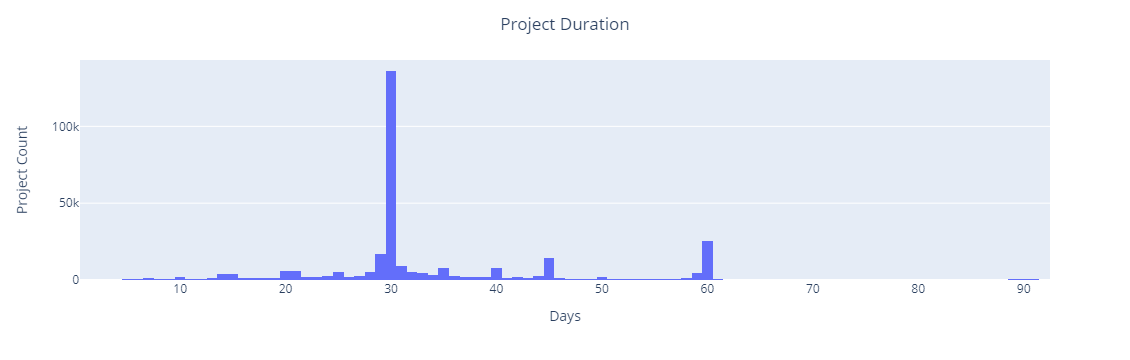

In [70]:
fig1 = (
    px.histogram(x=df_plot['duration_days'])
    .update_layout(
        title='Project Duration',
        title_x=0.5,
        xaxis_title ='Days',
        yaxis_title ='Project Count')
)

fig1.show()

### Show barplot - count of projects per each 'main_category'

* X axis contains 'main_category'
* Y axis contains count of projects (per each 'main_category')

**3 optional bonuses for up +2 points:**
* **+0.5 point**: improve readability of the chart
  * i.e. show only main-categories occuring with high frequency (which have frequency >= 100)
* **+0.5point**: sort bars from highest to lowest count
* **+0.5point**: show counts above each bar
* **+0.5point**: add 3 titles to the chart - main chart + X axis + Y axis

In [71]:
# Write code here

df_plot2 = (
    df_fixed_values
    .groupby('main_category')
    .agg(project_count = ('ID', 'nunique'))
    .query('project_count >= 100')
    .sort_values('project_count', ascending=False)
)

df_plot2




project_count
main_category               
Film & Video           57679
Music                  46744
Publishing             34233
Games                  28008
Technology             26128
Art                    23975
Design                 23872
Food                   21229
Fashion                18398
Theater                 9972
Photography             9680
Comics                  8753
Crafts                  7187
Journalism              4073
Dance                   3375

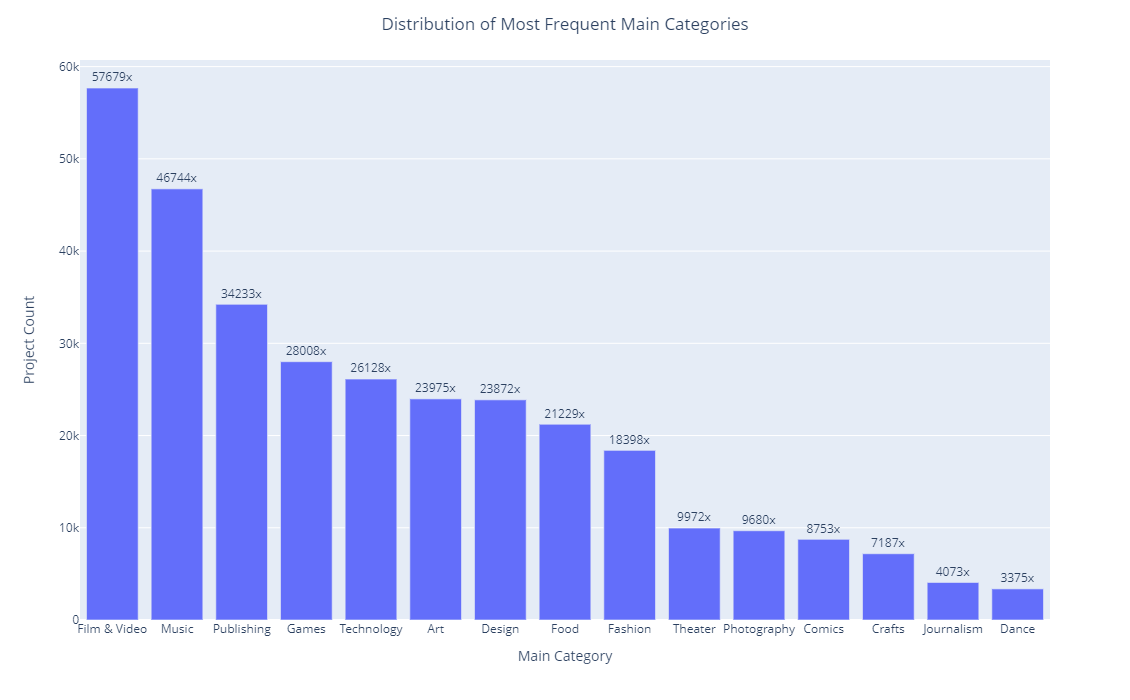

In [72]:
fig2 = (
    px.bar(x=df_plot2.index, y=df_plot2['project_count'], text=df_plot2['project_count'])
    .update_layout(
        title='Distribution of Most Frequent Main Categories',
        title_x=0.5,
        xaxis_title='Main Category',
        yaxis_title='Project Count',
        height=700
    )
    .update_traces(
        texttemplate='%{text}x',
        textposition='outside')
)

fig2.show()
    
    

## Bonus question (+1 bonus point)

### Which project `name` is the longest one? 

* We are interested in projects, which have longest value in column `name`
* Possibly, there are more projects with the same maximum count of characters - show them all

In [73]:
# Write code here


df_fixed_values['name'] = df_fixed_values['name'].astype(str)

max_length = df_fixed_values['name'].apply(len).max()
length = df_fixed_values['name'].apply(len)

result = df_fixed_values[length == max_length]

result






ID                                               name  \
20002   1118282973  NYCV - Young Professional Orchestra- Carnegie ...   
39992   1237657936  "Doll's Eye" by Sami S. Chetrit, a political t...   
61268   1364281269  The Beauty from Nowhere Project: A collection ...   
108452  1643783791  Wooden Box - The film - a documentary about Be...   
117927  1700039760  ACID MARSHMALLOW: Improve my Audio & Visual do...   
125896  1747769892  Save your ship - SaveYourShip.com Complimentar...   
134991   180220754  A Little Book About Nothing:How Seinfeld Chang...   
152835  1908331441  Always Something Doing: An Archive of Copyrigh...   
181993   208400996  Templar Crusade Issue #2: a comic book about f...   
186198  2108588456  HELP START UP NFJM 030: A BENEFIT LP fea. NO A...   
211420   326445402  HISTORIC BOOK /TV SERIES VISITING THE VERY BES...   
240981   502572445  Design for Mosaic Sculpture Playground and Mos...   
317136    95999181  American Farmer Catalog: documenting farming t...   
317846   964299684  create the 2010 NEXT TO LAST FESTIVAL and get ...   

       main_category         category            launched            deadline  \
20002          Music  Classical Music 2010-07-02 14:53:50 2010-09-01 18:00:00   
39992     Publishing       Nonfiction 2009-12-22 07:48:54 2010-03-20 21:27:00   
61268    Photography      Photography 2010-04-21 01:03:55 2010-07-19 17:29:00   
108452  Film & Video      Documentary 2009-09-15 02:27:31 2009-12-10 23:12:00   
117927  Film & Video      Documentary 2009-11-26 10:12:11 2009-12-29 05:30:00   
125896    Technology       Technology 2010-06-22 10:10:52 2010-08-15 21:06:00   
134991    Publishing       Nonfiction 2010-09-08 03:12:43 2010-10-08 03:12:43   
152835  Film & Video        Webseries 2010-10-05 02:22:24 2010-11-16 02:22:24   
181993        Comics           Comics 2010-06-13 08:15:14 2010-07-08 11:05:00   
186198         Music            Music 2010-08-04 21:35:53 2010-09-06 23:27:00   
211420    Publishing       Nonfiction 2010-01-06 18:37:28 2010-04-06 18:36:00   
240981           Art        Sculpture 2009-08-10 20:05:40 2009-11-06 21:00:00   
317136   Photography      Photography 2010-05-26 18:43:43 2010-08-24 06:59:00   
317846         Music       Indie Rock 2009-09-02 06:35:43 2009-12-01 05:30:00   

           goal  pledged currency usd pledged backers     state country  \
20002    2000.0    540.0      USD         540      13  canceled      US   
39992   13500.0      0.0      USD           0       0  canceled      US   
61268     800.0     30.0      USD          30       1  canceled      US   
108452   5000.0      0.0      USD           0       0  canceled      US   
117927   1600.0      0.0      USD           0       0  canceled      US   
125896  80000.0    370.0      USD         370       4  canceled      US   
134991   3000.0      0.0      USD           0       0  canceled      US   
152835  13000.0    210.0      USD         210       5  canceled      US   
181993   1000.0      0.0      USD           0       0  canceled      US   
186198  10000.0    660.0      USD         660      25  canceled      US   
211420  16500.0   4700.0      USD        4700      19  canceled      US   
240981   4800.0    135.0      USD         135       5  canceled      US   
317136   5000.0    300.0      USD         300       3  canceled      US   
317846   9999.0     37.5      USD        37.5       3  canceled      US   

        duration_days  
20002            61.0  
39992            88.0  
61268            89.0  
108452           86.0  
117927           32.0  
125896           54.0  
134991           30.0  
152835           42.0  
181993           25.0  
186198           33.0  
211420           89.0  
240981           88.0  
317136           89.0  
317846           89.0